# Perform CIFAR-10 Dataset Classification using Keras

#### 1) Perform CIFAR-10 Dataset Classification using 1 Convolution Layer

##### 2) Perform CIFAR-10 Dataset Classification using 2 Convolution Layer

##### 3) Perform CIFAR-10 Dataset Classification using 3 Convolution Layer

##### 4) Compare the performance of models used in Question 1, 2 and 3

##### 5) Use 2 Convolutions before performing activation and compare the results with all other models

##### 6) Solve the CIFAR-10 classification. Don't use any of the above model's architecture. Come up with your own architecture

### $ Important Points $

1. Your code should be well commented.
2. Please Document your IPYNB in most verbose way possible
3. Comparision of Models should be done via Graphs and Plots


## Let the code commence :)

# Imports

In [28]:
from keras.layers import Convolution2D, MaxPooling2D, Activation, Dense, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.activations import relu,softmax,sigmoid
from keras.optimizers import rmsprop
from keras.utils import to_categorical 
import pandas as pd

%matplotlib inline

# Reading the test/train data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing the X data 

In [3]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')
x_train /= 255
x_test /= 255

# One hot encoding for Y data(10 classes)

In [4]:
y_train_one_hot = to_categorical((y_train), 10)
y_test_one_hot = to_categorical((y_test), 10)

# Defining variables

In [40]:
epochs = 10 #hyperparameters
batch_size = 12 #hyperparameters
num_classes = len(pd.unique(y_train))
test_accuracy = []
train_accuracy = []

# Model 1 - Conv-ReLu-Pooling-FC

In [6]:
model1 = Sequential()
model1.add(Convolution2D(3,(3,3),input_shape = (32,32,3)))
model1.add(Activation(relu))
model1.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model1.add(Flatten())
model1.add(Dense(10, activation = 'softmax'))
model1.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
model1_fit = model1.fit(x_train,y_train_one_hot,epochs = 10,verbose = 2,batch_size = 12,validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
26s - loss: 1.7949 - acc: 0.3591 - val_loss: 1.6445 - val_acc: 0.4167
Epoch 2/10
24s - loss: 1.6023 - acc: 0.4330 - val_loss: 1.5952 - val_acc: 0.4362
Epoch 3/10
25s - loss: 1.5468 - acc: 0.4585 - val_loss: 1.6420 - val_acc: 0.4118
Epoch 4/10
24s - loss: 1.5147 - acc: 0.4700 - val_loss: 1.5514 - val_acc: 0.4552
Epoch 5/10
25s - loss: 1.4942 - acc: 0.4773 - val_loss: 1.5188 - val_acc: 0.4664
Epoch 6/10
23s - loss: 1.4766 - acc: 0.4841 - val_loss: 1.6484 - val_acc: 0.4295
Epoch 7/10
24s - loss: 1.4647 - acc: 0.4880 - val_loss: 1.4888 - val_acc: 0.4756
Epoch 8/10
24s - loss: 1.4548 - acc: 0.4942 - val_loss: 1.4808 - val_acc: 0.4774
Epoch 9/10
24s - loss: 1.4486 - acc: 0.4962 - val_loss: 1.5633 - val_acc: 0.4578
Epoch 10/10
25s - loss: 1.4415 - acc: 0.4986 - val_loss: 1.4765 - val_acc: 0.4846


In [41]:
test_accuracy.append(model1.evaluate(x_test,y_test_one_hot)[1])
train_accuracy.append(model1_fit.history['acc'][epochs-1])

 9920/10000 [============================>.] - ETA: 0s

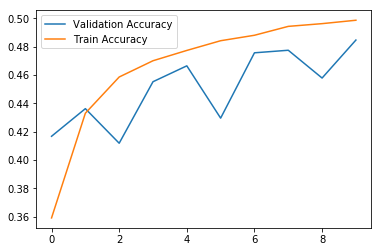

In [8]:
plt.plot(model1_fit.epoch, model1_fit.history['val_acc'])
plt.plot(model1_fit.epoch, model1_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Model 2 - Conv-ReLu-Pooling-Conv-ReLu-Pooling-FC

In [13]:
model2 = Sequential()
model2.add(Convolution2D(3,(3,3),input_shape = (32,32,3)))
model2.add(Activation(relu))
model2.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model2.add(Convolution2D(3,(3,3)))
model2.add(Activation(relu))
model2.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model2.add(Flatten())
model2.add(Dense(10, activation = 'softmax'))
model2.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
model2_fit = model2.fit(x_train,y_train_one_hot,epochs = 10,verbose = 2,batch_size = 12,validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
28s - loss: 1.9598 - acc: 0.2859 - val_loss: 1.8149 - val_acc: 0.3487
Epoch 2/10
29s - loss: 1.7601 - acc: 0.3727 - val_loss: 1.7383 - val_acc: 0.3744
Epoch 3/10
29s - loss: 1.6963 - acc: 0.3931 - val_loss: 1.8361 - val_acc: 0.3607
Epoch 4/10
29s - loss: 1.6635 - acc: 0.4028 - val_loss: 1.6909 - val_acc: 0.3829
Epoch 5/10
34s - loss: 1.6432 - acc: 0.4109 - val_loss: 1.6832 - val_acc: 0.3961
Epoch 6/10
28s - loss: 1.6304 - acc: 0.4146 - val_loss: 1.6123 - val_acc: 0.4166
Epoch 7/10
29s - loss: 1.6196 - acc: 0.4205 - val_loss: 1.6950 - val_acc: 0.3868
Epoch 8/10
29s - loss: 1.6094 - acc: 0.4231 - val_loss: 1.6449 - val_acc: 0.4045
Epoch 9/10
29s - loss: 1.5985 - acc: 0.4276 - val_loss: 1.6012 - val_acc: 0.4219
Epoch 10/10
28s - loss: 1.5895 - acc: 0.4322 - val_loss: 1.6049 - val_acc: 0.4191


In [42]:
test_accuracy.append(model2.evaluate(x_test,y_test_one_hot)[1])
train_accuracy.append(model2_fit.history['acc'][epochs-1])

 9824/10000 [============================>.] - ETA: 0s

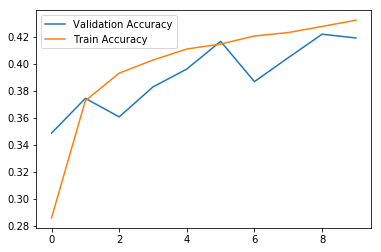

In [15]:
plt.plot(model2_fit.epoch, model2_fit.history['val_acc'])
plt.plot(model2_fit.epoch, model2_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Model 3 - Conv-Conv-ReLu-Pooling-Conv-ReLu-Pooling-FC-FC

In [16]:
model3 = Sequential()
model3.add(Convolution2D(3,(3,3),input_shape = (32,32,3)))
model3.add(Convolution2D(32,(3,3)))
model3.add(Activation(relu))
model3.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model3.add(Convolution2D(3,(3,3)))
model3.add(Activation(relu))
model3.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model3.add(Flatten())
model3.add(Dense(512, activation = 'sigmoid'))
model3.add(Dense(10, activation = 'softmax'))
model3.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
model3_fit = model3.fit(x_train,y_train_one_hot,epochs = 10,verbose = 2,batch_size = 12,validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
63s - loss: 1.7835 - acc: 0.3521 - val_loss: 1.7556 - val_acc: 0.3871
Epoch 2/10
63s - loss: 1.4570 - acc: 0.4771 - val_loss: 1.4814 - val_acc: 0.4766
Epoch 3/10
64s - loss: 1.3435 - acc: 0.5194 - val_loss: 1.3983 - val_acc: 0.5074
Epoch 4/10
62s - loss: 1.2992 - acc: 0.5399 - val_loss: 1.3211 - val_acc: 0.5310
Epoch 5/10
62s - loss: 1.2887 - acc: 0.5484 - val_loss: 1.3884 - val_acc: 0.5259
Epoch 6/10
64s - loss: 1.3019 - acc: 0.5483 - val_loss: 1.4148 - val_acc: 0.5264
Epoch 7/10
63s - loss: 1.3350 - acc: 0.5372 - val_loss: 1.9407 - val_acc: 0.4174
Epoch 8/10
64s - loss: 1.3596 - acc: 0.5334 - val_loss: 1.6880 - val_acc: 0.4378
Epoch 9/10
63s - loss: 1.3914 - acc: 0.5261 - val_loss: 2.0468 - val_acc: 0.3519
Epoch 10/10
59s - loss: 1.4362 - acc: 0.5135 - val_loss: 1.7170 - val_acc: 0.4385


In [43]:
test_accuracy.append(model3.evaluate(x_test,y_test_one_hot)[1])
train_accuracy.append(model3_fit.history['acc'][epochs-1])

 9984/10000 [============================>.] - ETA: 0s

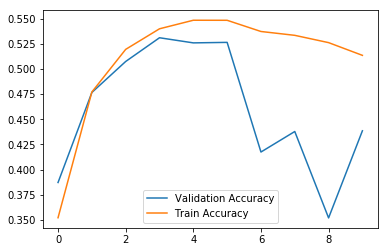

In [18]:
plt.plot(model3_fit.epoch, model3_fit.history['val_acc'])
plt.plot(model3_fit.epoch, model3_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Model 4 - Conv-ReLu-Conv-ReLu-Pooling-Conv-ReLu-Pooling-FC-FC

In [19]:
model4 = Sequential()
model4.add(Convolution2D(64,(3,3),input_shape = (32,32,3)))
model4.add(Activation(relu))
model4.add(Convolution2D(32,(3,3)))
model4.add(Activation(relu))
model4.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model4.add(Convolution2D(16,(3,3)))
model4.add(Activation(relu))
model4.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model4.add(Flatten())
model4.add(Dense(512, activation = 'sigmoid'))
model4.add(Dense(10, activation = 'softmax'))
model4.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
model4_fit = model4.fit(x_train,y_train_one_hot,epochs = 10,verbose = 2,batch_size = 12,validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
272s - loss: 1.5023 - acc: 0.4603 - val_loss: 1.8245 - val_acc: 0.4164
Epoch 2/10
280s - loss: 1.1696 - acc: 0.5960 - val_loss: 1.3750 - val_acc: 0.5411
Epoch 3/10
273s - loss: 1.1273 - acc: 0.6172 - val_loss: 1.2925 - val_acc: 0.5720
Epoch 4/10
282s - loss: 1.1192 - acc: 0.6263 - val_loss: 1.1799 - val_acc: 0.5937
Epoch 5/10
268s - loss: 1.1095 - acc: 0.6335 - val_loss: 1.1610 - val_acc: 0.6152
Epoch 6/10
268s - loss: 1.1341 - acc: 0.6235 - val_loss: 1.3085 - val_acc: 0.5914
Epoch 7/10
282s - loss: 1.1546 - acc: 0.6208 - val_loss: 1.3652 - val_acc: 0.5648
Epoch 8/10
272s - loss: 1.1694 - acc: 0.6160 - val_loss: 1.3428 - val_acc: 0.5765
Epoch 9/10
250s - loss: 1.1963 - acc: 0.6110 - val_loss: 1.2078 - val_acc: 0.5975
Epoch 10/10
247s - loss: 1.2396 - acc: 0.5958 - val_loss: 1.1738 - val_acc: 0.6179


In [44]:
test_accuracy.append(model4.evaluate(x_test,y_test_one_hot)[1])
train_accuracy.append(model4_fit.history['acc'][epochs-1])

 9984/10000 [============================>.] - ETA: 0s

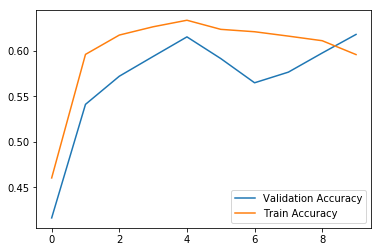

In [21]:
plt.plot(model4_fit.epoch, model4_fit.history['val_acc'])
plt.plot(model4_fit.epoch, model4_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Model 5 - Conv-ReLu-Conv-ReLu-Pooling-Conv-ReLu-Conv-ReLu-Pooling-Conv-ReLu-Pooling-FC-FC-FC

In [22]:
model5 = Sequential()
model5.add(Convolution2D(64,(3,3),input_shape = (32,32,3)))
model5.add(Activation(relu))
model5.add(Convolution2D(32,(3,3)))
model5.add(Activation(relu))
model5.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model5.add(Convolution2D(64,(3,3))
model5.add(Activation(relu))
model5.add(Convolution2D(32,(3,3)))
model5.add(Activation(relu))
model5.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model5.add(Convolution2D(16,(3,3)))
model5.add(Activation(relu))
model5.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model5.add(Flatten())
model5.add(Dense(512, activation = 'sigmoid'))
model5.add(Dense(512, activation = 'sigmoid'))
model5.add(Dense(10, activation = 'softmax'))
model5.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
model5_fit = model5.fit(x_train,y_train_one_hot,epochs = 10,verbose = 2,batch_size = 12,validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
278s - loss: 1.6586 - acc: 0.3945 - val_loss: 1.3974 - val_acc: 0.4954
Epoch 2/10
263s - loss: 1.2843 - acc: 0.5422 - val_loss: 1.2506 - val_acc: 0.5593
Epoch 3/10
270s - loss: 1.1400 - acc: 0.6015 - val_loss: 1.1965 - val_acc: 0.5815
Epoch 4/10
276s - loss: 1.0906 - acc: 0.6237 - val_loss: 1.3151 - val_acc: 0.5722
Epoch 5/10
5935s - loss: 1.1047 - acc: 0.6234 - val_loss: 1.2410 - val_acc: 0.5730
Epoch 6/10
259s - loss: 1.1439 - acc: 0.6107 - val_loss: 1.3698 - val_acc: 0.5559
Epoch 7/10
261s - loss: 1.1462 - acc: 0.6091 - val_loss: 1.2688 - val_acc: 0.5758
Epoch 8/10
258s - loss: 1.1633 - acc: 0.6048 - val_loss: 1.3212 - val_acc: 0.5709
Epoch 9/10
260s - loss: 1.1812 - acc: 0.5959 - val_loss: 1.4990 - val_acc: 0.5155
Epoch 10/10
261s - loss: 1.2135 - acc: 0.5875 - val_loss: 1.4236 - val_acc: 0.5457


In [45]:
test_accuracy.append(model5.evaluate(x_test,y_test_one_hot)[1])
train_accuracy.append(model5_fit.history['acc'][epochs-1])

 9984/10000 [============================>.] - ETA: 0s

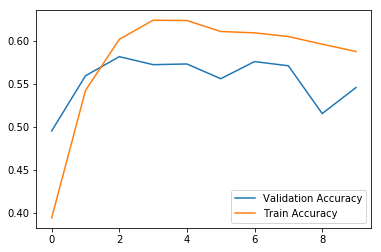

In [24]:
plt.plot(model5_fit.epoch, model5_fit.history['val_acc'])
plt.plot(model5_fit.epoch, model5_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Test Accuracy of 5 models

In [46]:
test_accuracy = [t*100 for t in test_accuracy]
test_accuracy

[47.43, 42.420000000000002, 43.850000000000001, 61.480000000000004, 54.25]

# Train Accuracy of 5 models

In [47]:
train_accuracy = [t*100 for t in train_accuracy]
train_accuracy

[49.857499775141477,
 43.222499868646267,
 51.349999823048705,
 59.577499783933163,
 58.747499810084705]

# Training-Testing Plot Model wise

In [48]:
model_plot = pd.concat([pd.DataFrame([1,2,3,4,5]), pd.DataFrame(train_accuracy),pd.DataFrame(test_accuracy)],axis=1)

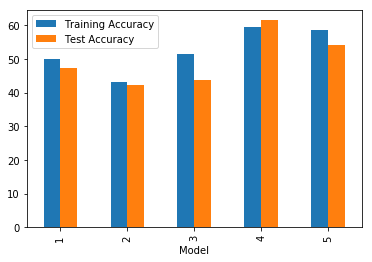

In [49]:
model_plot.columns = ['Model','Training Accuracy','Test Accuracy']
model_plot = model_plot.set_index(['Model'])
model_plot.plot(kind='bar')
plt.show()